In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

In [30]:
#data =pd.read_csv(r"C:\Users\Cherif_Mbengue\Desktop\covid-senegal.csv",sep=";")
data =pd.read_csv("covid-senegal.csv",sep=";")
data

,date,tests,cas,contact,importe,communautaire
0,02/03/2020,1.0,1,0,0,0
1,03/03/2020,2.0,1,0,1,0
2,04/03/2020,2.0,2,1,1,0
3,05/03/2020,NaN,0,0,0,0
4,06/03/2020,2.0,0,0,0,0
...,...,...,...,...,...,...
491,07/07/2021,2388.0,356,127,0,229
492,08/07/2021,2166.0,354,135,1,218
493,09/07/2021,2104.0,476,215,0,261
494,10/07/2021,2762.0,380,136,0,234


In [31]:
data.isnull().sum()

date             0
tests            1
cas              0
contact          0
importe          0
communautaire    0
dtype: int64

In [32]:
data.dtypes
# Avant la converssion de la colonne "date", il est de type 'object' 

date              object
tests            float64
cas                int64
contact            int64
importe            int64
communautaire      int64
dtype: object

In [33]:
data['date'] =  pd.to_datetime(data['date'], format='%d/%m/%Y')
data.dtypes
# Aprés transformation, la colonne "date" est maintenant de type "datetime"

date             datetime64[ns]
tests                   float64
cas                       int64
contact                   int64
importe                   int64
communautaire             int64
dtype: object

In [34]:
### Suppréssion des lignes contenants une valeur manquantes
data=data.dropna() ### Dans notre base, il n'existe pas de valeur manquante donc la base reste intact. Tu peux s'amuser à creer une
data              ### valeur manquante et à excécuter la fonction pour voir. La ligne avec valeurs manquantes va se supprimer

,date,tests,cas,contact,importe,communautaire
0,2020-03-02,1.0,1,0,0,0
1,2020-03-03,2.0,1,0,1,0
2,2020-03-04,2.0,2,1,1,0
4,2020-03-06,2.0,0,0,0,0
5,2020-03-07,2.0,0,0,0,0
...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229
492,2021-07-08,2166.0,354,135,1,218
493,2021-07-09,2104.0,476,215,0,261
494,2021-07-10,2762.0,380,136,0,234


In [35]:
data.isnull().sum()

date             0
tests            0
cas              0
contact          0
importe          0
communautaire    0
dtype: int64

# QUESTION 2

In [36]:
proportion=(data['cas']/data['tests'])*100
data=pd.concat([data,proportion],axis=1, ignore_index=False)
data.columns=['date', 'tests', 'cas', 'contact', 'importe', 'communautaire', 'proportion']
data

,date,tests,cas,contact,importe,communautaire,proportion
0,2020-03-02,1.0,1,0,0,0,100.000000
1,2020-03-03,2.0,1,0,1,0,50.000000
2,2020-03-04,2.0,2,1,1,0,100.000000
4,2020-03-06,2.0,0,0,0,0,0.000000
5,2020-03-07,2.0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,14.907873
492,2021-07-08,2166.0,354,135,1,218,16.343490
493,2021-07-09,2104.0,476,215,0,261,22.623574
494,2021-07-10,2762.0,380,136,0,234,13.758146


# QUESTION 3

In [37]:
#data["prop"]=(data['cas']/data['tests'])*100
#data

In [38]:
data["total"]=data["cas"].cumsum()
data

,date,tests,cas,contact,importe,communautaire,proportion,total
0,2020-03-02,1.0,1,0,0,0,100.000000,1
1,2020-03-03,2.0,1,0,1,0,50.000000,2
2,2020-03-04,2.0,2,1,1,0,100.000000,4
4,2020-03-06,2.0,0,0,0,0,0.000000,4
5,2020-03-07,2.0,0,0,0,0,0.000000,4
...,...,...,...,...,...,...,...,...
491,2021-07-07,2388.0,356,127,0,229,14.907873,46489
492,2021-07-08,2166.0,354,135,1,218,16.343490,46843
493,2021-07-09,2104.0,476,215,0,261,22.623574,47319
494,2021-07-10,2762.0,380,136,0,234,13.758146,47699


# QUESTION 4

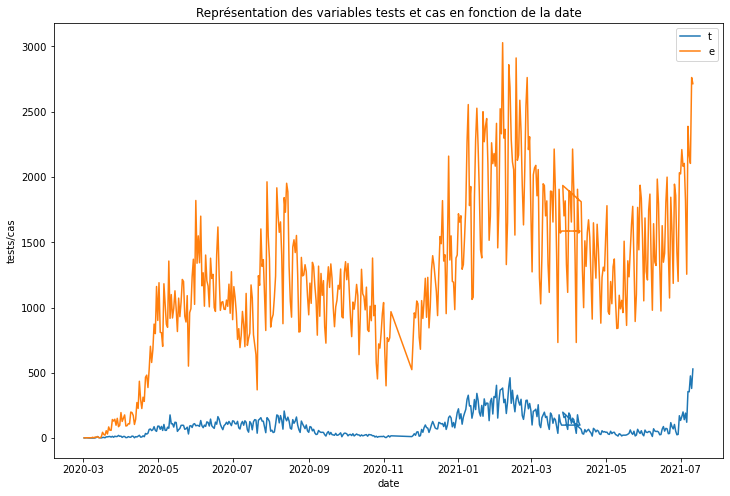

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(data["date"], data["cas"])
plt.plot(data["date"], data["tests"])
plt.title("Représentation des variables tests et cas en fonction de la date")
plt.xlabel("date")
plt.ylabel("tests/cas")
plt.legend("tests/cas")
plt.show()

# QUESTION 5

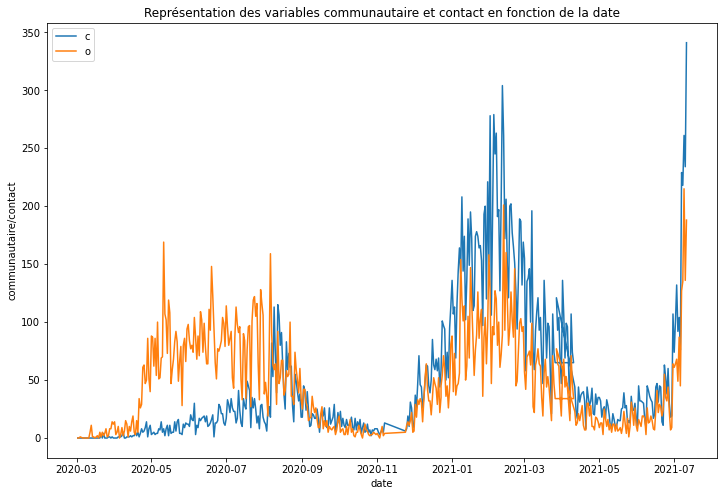

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(data["date"], data["communautaire"])
plt.plot(data["date"], data["contact"])
plt.title("Représentation des variables communautaire et contact en fonction de la date")
plt.xlabel("date")
plt.ylabel("communautaire/contact")
plt.legend("communautaire/contact")
plt.show()

# QUESTION 6

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba9aa533d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba9aa53a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba9aa53040>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba9ad1e190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba9ad1e4f0>],
 'means': []}

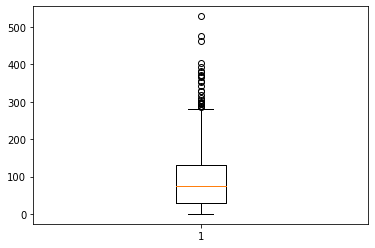

In [41]:
plt.boxplot(data["cas"]) 

In [42]:
#A travers cette représentation, on constate qu'il y a des valeurs aberrantes sur cette variable.

(array([192., 126.,  87.,  41.,  12.,  21.,   8.,   5.,   2.,   1.]),
 array([  0. ,  52.9, 105.8, 158.7, 211.6, 264.5, 317.4, 370.3, 423.2,
        476.1, 529. ]),
 <BarContainer object of 10 artists>)

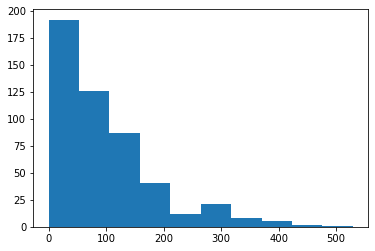

In [43]:
plt.hist(data["cas"]) 

# QUESTION 7

In [44]:
def discrediter(x):
    if x>=np.min(data.cas) and x<np.quantile(data.cas, 0.25):
        return "A"
    elif x>=np.quantile(data.cas, 0.25) and x<np.quantile(data.cas, 0.5):
        return "B"
    elif x>=np.quantile(data.cas, 0.5) and x<np.quantile(data.cas, 0.75):
        return "C"
    else:
        return "D"
    
data["cas_classe"]=data["cas"].apply(discrediter)
data["cas_classe"]=data["cas_classe"].astype('category')
data.head()

,date,tests,cas,contact,importe,communautaire,proportion,total,cas_classe
0,2020-03-02,1.0,1,0,0,0,100.0,1,A
1,2020-03-03,2.0,1,0,1,0,50.0,2,A
2,2020-03-04,2.0,2,1,1,0,100.0,4,A
4,2020-03-06,2.0,0,0,0,0,0.0,4,A
5,2020-03-07,2.0,0,0,0,0,0.0,4,A


In [45]:
data.dtypes
data.shape

(495, 9)

# QUESTION 8

In [46]:
data["cas_classe"].value_counts()

B    125
D    124
C    124
A    122
Name: cas_classe, dtype: int64

# QUESTION 9

In [47]:
#On suppose que la variables cas suit une loi binomiale négative N B(θ, p), θ > 0 et < 0 < p < 1.
#Calculer les estimations de θ et p en utilisant la méthode des moments.

In [48]:
#La variable cas suit une loi binomiale negative N B(θ, p), alors son esperance et sa variance s'ecrivent sous la forme suivante:
#E["cas"]=θq/p
#var["cas"]=θq/p²
# Selon la methode des moments on egalise l'esperance theorique a l'esperance empirique c'est a dire θq/p = x_barre
# apres avoir tirer, on a: p_chapeau= x_barre/ var[x] et θ_chapeau = p_chapeau*x_barre/(1-p_chapeau)

In [49]:
x_barre=data["cas"].mean()
x_barre

97.43030303030304

In [50]:
var_x=data["cas"].var()
var_x

7877.6707397865275

In [51]:
p_chapeau = x_barre/var_x
p_chapeau

0.012367907500655867

In [52]:
teta_chapeau = p_chapeau*x_barre/(1-p_chapeau)
teta_chapeau

1.2200990478045437

In [53]:
teta_chapeau=(x_barre*x_barre)/(var_x-x_barre)
teta_chapeau

1.2200990478045437

# QUESTION 10

In [54]:
#On suppose que la variables cas suit une loi binomiale négative N B(θ, p), θ > 0 et < 0 < p < 1.
#Calculer les estimations de θ et p en utilisant la méthode du maximum de vraissemblance.

In [55]:
#La variable cas suit une loi binomiale negative N B(θ, p), alors son esperance et sa variance s'ecrivent sous la forme suivante:
#E["cas"]=θq/p
#var["cas"]=θq/p²
# La methode du maximum de vraisemblance est solution du systeme ∂L(x,θ)/∂θ=0 et ∂²L(x,θ)/∂θ²<0
# ∂logL(x,θ)/∂θ=0 et ∂²logL(x,θ)/∂θ²<0
#f(x)=C-n,x(p)^x(p-1)^x
#l=somme[logC-n,x + nlogp + θlog(p-1)]
#∂L/∂p = n/p + θ/(p-1)
#∂L/∂p = 0, ce qui implique que n/p = -θ/(p-1)
# Apres manipulation on a : p_chapeau = n/(n + θ)

In [62]:
#def maximum_vs (data, iter_max=1000):
    #data = pd.dataFrame(data)
    #mu0 = data.mean()
    #c0 = data.cov()
    
    #for j in range(iter_max):
        #w = []
        
        #for i in data :
            #wk = (5  + len(data)/(5+np.dot(np.dot(np.transpose(i-mu0), np.linalg.inv(c0)), (i - mu0)))
            #w.append(wk)
            #w = np.array(w)
            
            #mu = (np.dot((w, data))/(np.sum(w)))
            
            #c=0
            #for i in range(len(data)):
                #c+=w[i] * np.dot((data[i]-mu0), (np.transpose(data[i] - mu0)))
                #cov = c/len(data)
                
                #mu0 = mu
                #c0 = cov
    #return mu0,c0

In [57]:
x_barre=data["cas"].mean()
x_barre

97.43030303030304

In [58]:
teta_chapeau = p_chapeau*x_barre/(1-p_chapeau)
teta_chapeau

1.2200990478045437

In [61]:
n = 495 
p_chapeau = n/(n + teta_chapeau)
p_chapeau

0.9975412139690718